# Part 1 - Setup and Data Preparation
In this section, we will:
- Import necessary packages for this demonstration
- Load the data
- Ensure that qualitative predictor variables are of the *category* data type

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf

# Import method for regression from 'sklearn'
from sklearn.linear_model import LinearRegression

# Import 'train_test_split' from 'sklearn' for train-validation-test split
from sklearn.model_selection import train_test_split

# Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error

# Import method to compute VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv(r'carprices.csv', index_col = 'car_ID')
df.head()

,symboling,carname,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,two,hatchback,front,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,four,sedan,front,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,four,sedan,front,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Load the data description and take a look at it
dd = pd.read_csv(r'carpricesdatadescription.csv', index_col = 'feature')
dd

,description
feature,
car_ID,unique id of each observation (Integer)
symboling,risk rating (Categorical)
carcompany,name of car company (Categorical)
doornumber,number of doors in a car (Categorical)
carbody,body of car (Categorical)
enginelocation,location of car engine (Categorical)
wheelbase,wheelbase of car (Numeric)
carlength,length of car (Numeric)
carwidth,width of car (Numeric)


In [4]:
# Look at the specifics of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   carname           205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   enginelocation    205 non-null    object 
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  cylindernumber    205 non-null    object 
 11  enginesize        205 non-null    int64  
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    int64  
 16  peakrpm           205 non-null    int64  
 1

Most features in this dataset are numeric, being either of the *int64* datatype or the *float64* datatype, but some features are of the *object* datatype. These are, in fact, strings. Typically, when conducting categorical analysis, it is better to convert these into the *category* datatype.

In [5]:
# Convert qualitative predictors to the 'category' data type
categorical_columns = df.select_dtypes(include = 'object').columns
df[categorical_columns] = df[categorical_columns].astype('category')

In [6]:
# Look at the specifics of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         205 non-null    int64   
 1   carname           205 non-null    category
 2   doornumber        205 non-null    category
 3   carbody           205 non-null    category
 4   enginelocation    205 non-null    category
 5   wheelbase         205 non-null    float64 
 6   carlength         205 non-null    float64 
 7   carwidth          205 non-null    float64 
 8   carheight         205 non-null    float64 
 9   curbweight        205 non-null    int64   
 10  cylindernumber    205 non-null    category
 11  enginesize        205 non-null    int64   
 12  boreratio         205 non-null    float64 
 13  stroke            205 non-null    float64 
 14  compressionratio  205 non-null    float64 
 15  horsepower        205 non-null    int64   
 16  peakrpm           205 non-

**Note:** The *object* datatype entries are now of the *category* datatype. This helps in conducting categorical analysis more efficiently.

It is important to note that the *symboling* feature has been recorded as an integer but it is actually a categorical variable. We can understand this from the data description.

In [7]:
# Convert the 'symboling' feature to the 'category' datatype
df['symboling'] = df['symboling'].astype('category')

In [8]:
# Drop the car name as it won't be useful in the overall analysis
df.drop(labels = 'carname', axis = 1, inplace = True)

**Note:** Names, identifiers, and so on, are generally not considered as valid predictor variables.

In [9]:
# Take a look at the data
df.head()

,symboling,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,
1,3,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,two,hatchback,front,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,four,sedan,front,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,four,sedan,front,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
# Check the shape and size of the data
df.shape

(205, 19)

**Note:** This is, of course, a small dataset. For this demonstration, we will use a subset of the features. Learners may explore with the original dataset at a later time.

In [11]:
# Retain a select number of columns for the purposes of this demonstration
df = df[['symboling',
         'carbody',
         'enginelocation',
         'carlength',
         'carwidth',
         'carheight',
         'curbweight',
         'horsepower',
         'citympg',
         'highwaympg',
         'price']]

In [12]:
# Take a look at the data
df.head()

,symboling,carbody,enginelocation,carlength,carwidth,carheight,curbweight,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,,
1,3,convertible,front,168.8,64.1,48.8,2548,111,21,27,13495.0
2,3,convertible,front,168.8,64.1,48.8,2548,111,21,27,16500.0
3,1,hatchback,front,171.2,65.5,52.4,2823,154,19,26,16500.0
4,2,sedan,front,176.6,66.2,54.3,2337,102,24,30,13950.0
5,2,sedan,front,176.6,66.4,54.3,2824,115,18,22,17450.0


In [13]:
# Check the shape and size of the data
df.shape

(205, 11)

In [14]:
# Look at the specifics of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   symboling       205 non-null    category
 1   carbody         205 non-null    category
 2   enginelocation  205 non-null    category
 3   carlength       205 non-null    float64 
 4   carwidth        205 non-null    float64 
 5   carheight       205 non-null    float64 
 6   curbweight      205 non-null    int64   
 7   horsepower      205 non-null    int64   
 8   citympg         205 non-null    int64   
 9   highwaympg      205 non-null    int64   
 10  price           205 non-null    float64 
dtypes: category(3), float64(4), int64(4)
memory usage: 15.6 KB


In [15]:
# Store the categorical column names
categorical_columns = df.select_dtypes(include = 'category').columns

In [16]:
# Split the data into input and output
X = df.drop(labels = 'price', axis = 1)
y = df['price']

**Note:** The target variable here is the price of the car.

In [17]:
# Split the data into training and testing datasets
# Note: There's no validation dataset because we are not fine-tuning any of the models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Note:** Fixing a random state value ensures reproducibility of the analysis.

In [18]:
# Check the number of observations in the train and test datasets
print('Training dataset size: ', len(X_train))
print('Testing dataset size: ', len(X_test))

Training dataset size:  164
Testing dataset size:  41


# Part 2 - Exploratory Data Analysis
In this section, we will conduct EDA on the dataset

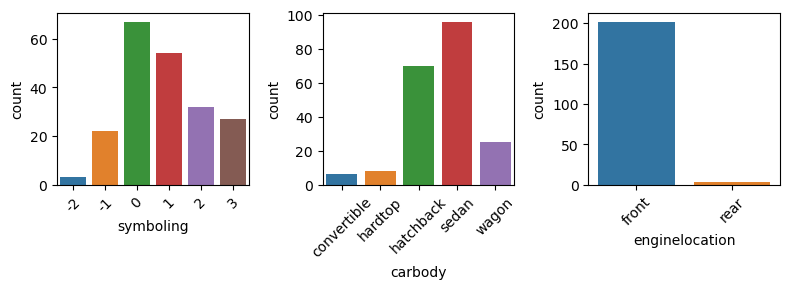

In [19]:
# Create count plots for the categorical variables
plt.figure(figsize = (8, 3))

fignum = 0
for featurename in categorical_columns:
    fignum = fignum + 1
    plt.subplot(1, 3, fignum)
    sns.countplot(data = df, x = featurename)
    plt.xticks(rotation = 45)

plt.tight_layout();

In [20]:
# Drop the engine location feature as there is very high class imbalance
df.drop(labels = 'enginelocation', axis = 1, inplace = True)

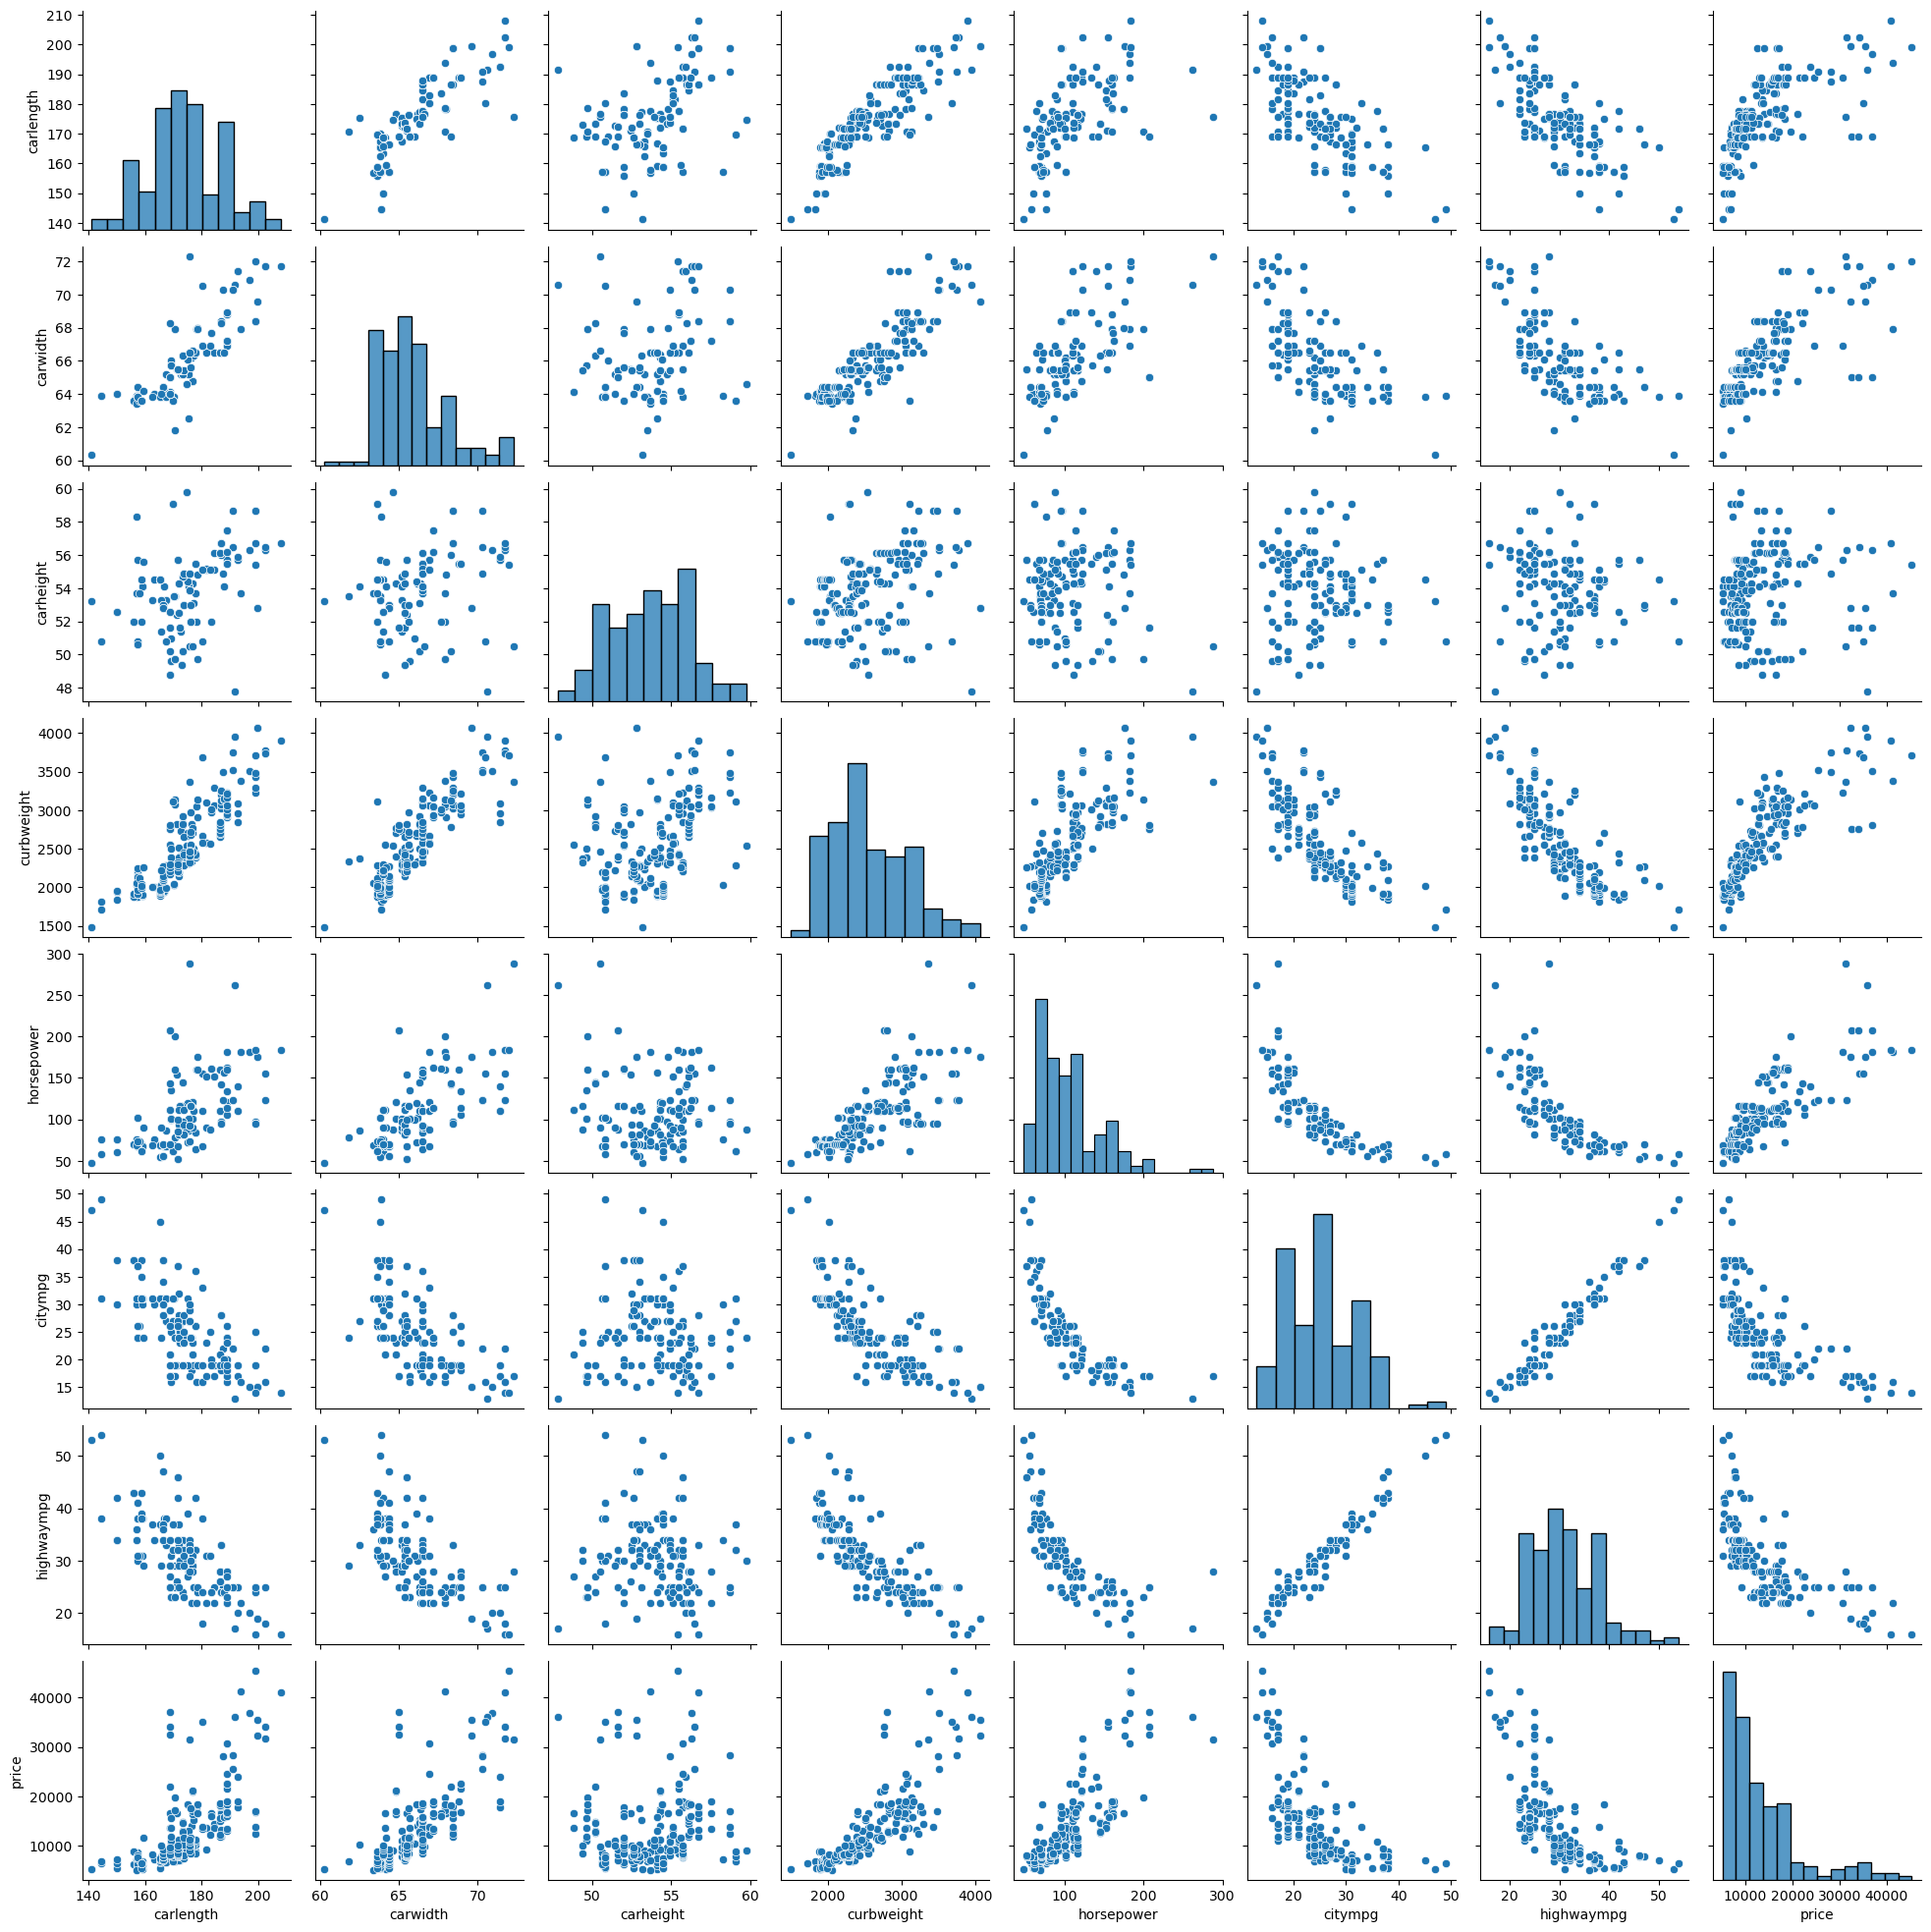

In [21]:
# Create a pair plot for the numerical features in the data set
sns.pairplot(df);

In [22]:
# Look at the correlation matrix for the numerical features in the dataset
df.corr().round(2)

,carlength,carwidth,carheight,curbweight,horsepower,citympg,highwaympg,price
carlength,1.00,0.84,0.49,0.88,0.55,-0.67,-0.70,0.68
carwidth,0.84,1.00,0.28,0.87,0.64,-0.64,-0.68,0.76
carheight,0.49,0.28,1.00,0.30,-0.11,-0.05,-0.11,0.12
curbweight,0.88,0.87,0.30,1.00,0.75,-0.76,-0.80,0.84
horsepower,0.55,0.64,-0.11,0.75,1.00,-0.80,-0.77,0.81
citympg,-0.67,-0.64,-0.05,-0.76,-0.80,1.00,0.97,-0.69
highwaympg,-0.70,-0.68,-0.11,-0.80,-0.77,0.97,1.00,-0.70
price,0.68,0.76,0.12,0.84,0.81,-0.69,-0.70,1.00


**Note:** Correlation values can tell us about redundancies in the dataset. For example, here, there's a very high correlation between the car weight and the car length. So, we can consider dropping on of these features if need be.

In [23]:
df_cat = pd.get_dummies(data = df, columns = ['symboling', 'carbody'], drop_first = False)

In [24]:
df_cat

,carlength,carwidth,carheight,curbweight,horsepower,citympg,highwaympg,price,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
car_ID,,,,,,,,,,,,,,,,,,,
1,168.8,64.1,48.8,2548,111,21,27,13495.0,0,0,0,0,0,1,1,0,0,0,0
2,168.8,64.1,48.8,2548,111,21,27,16500.0,0,0,0,0,0,1,1,0,0,0,0
3,171.2,65.5,52.4,2823,154,19,26,16500.0,0,0,0,1,0,0,0,0,1,0,0
4,176.6,66.2,54.3,2337,102,24,30,13950.0,0,0,0,0,1,0,0,0,0,1,0
5,176.6,66.4,54.3,2824,115,18,22,17450.0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,188.8,68.9,55.5,2952,114,23,28,16845.0,0,1,0,0,0,0,0,0,0,1,0
202,188.8,68.8,55.5,3049,160,19,25,19045.0,0,1,0,0,0,0,0,0,0,1,0
203,188.8,68.9,55.5,3012,134,18,23,21485.0,0,1,0,0,0,0,0,0,0,1,0


In [25]:
# Look at the correlation matrix for all the features in the dataset
df_cat.corr().round(2)

,carlength,carwidth,carheight,curbweight,horsepower,citympg,highwaympg,price,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
carlength,1.00,0.84,0.49,0.88,0.55,-0.67,-0.70,0.68,0.15,0.31,0.25,-0.36,-0.17,-0.03,-0.05,0.05,-0.44,0.27,0.22
carwidth,0.84,1.00,0.28,0.87,0.64,-0.64,-0.68,0.76,0.07,0.30,0.11,-0.24,-0.16,0.04,-0.03,0.07,-0.22,0.15,0.06
carheight,0.49,0.28,1.00,0.30,-0.11,-0.05,-0.11,0.12,0.12,0.31,0.30,-0.22,-0.04,-0.42,-0.16,-0.07,-0.48,0.24,0.46
curbweight,0.88,0.87,0.30,1.00,0.75,-0.76,-0.80,0.84,0.10,0.27,0.21,-0.38,-0.18,0.12,0.08,0.10,-0.29,0.10,0.16
horsepower,0.55,0.64,-0.11,0.75,1.00,-0.80,-0.77,0.81,0.08,0.12,-0.03,-0.21,-0.15,0.34,0.12,0.19,-0.05,-0.02,-0.06
citympg,-0.67,-0.64,-0.05,-0.76,-0.80,1.00,0.97,-0.69,-0.07,-0.13,-0.05,0.28,0.18,-0.35,-0.13,-0.11,0.12,0.01,-0.07
highwaympg,-0.70,-0.68,-0.11,-0.80,-0.77,0.97,1.00,-0.70,-0.08,-0.18,-0.07,0.28,0.21,-0.31,-0.12,-0.10,0.15,0.01,-0.11
price,0.68,0.76,0.12,0.84,0.81,-0.69,-0.70,1.00,0.04,0.18,0.10,-0.24,-0.17,0.19,0.19,0.23,-0.26,0.13,-0.04
symboling_-2,0.15,0.07,0.12,0.10,0.08,-0.07,-0.08,0.04,1.00,-0.04,-0.08,-0.07,-0.05,-0.05,-0.02,-0.02,-0.09,0.13,-0.05
symboling_-1,0.31,0.30,0.31,0.27,0.12,-0.13,-0.18,0.18,-0.04,1.00,-0.24,-0.21,-0.15,-0.14,-0.06,-0.07,-0.18,0.09,0.21


**Note:** Interpreting correlation matrices with categorical features can be challenging.

# Part 3 - Multiple Linear Regression Models
In this section, we will train and evaluate linear regression models for the data

## Numerical Predictors - *statsmodels*

### Model 1

In [26]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using 'carlength'
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_1 = smf.ols('price ~ carlength', data = df)
lr_model_1 = lr_model_1.fit()
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     177.4
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.68e-29
Time:                        12:23:48   Log-Likelihood:                -2068.1
No. Observations:                 205   AIC:                             4140.
Df Residuals:                     203   BIC:                             4147.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.369e+04   5792.793    -10.995      0.0

### Model 2

In [27]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using 'carlength' and 'carwidth'
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_2 = smf.ols('price ~ carlength + carwidth', data = df)
lr_model_2 = lr_model_2.fit()
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     141.4
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           4.04e-39
Time:                        12:23:48   Log-Likelihood:                -2042.8
No. Observations:                 205   AIC:                             4092.
Df Residuals:                     202   BIC:                             4101.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.589e+05   1.37e+04    -11.640      0.0

### Model 3

In [28]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using 'carlength', 'carwidth' and 'carheight'
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_3 = smf.ols('price ~ carlength + carwidth + carheight', data = df)
lr_model_3 = lr_model_3.fit()
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.18e-40
Time:                        12:23:48   Log-Likelihood:                -2036.5
No. Observations:                 205   AIC:                             4081.
Df Residuals:                     201   BIC:                             4094.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.233e+05   1.66e+04     -7.417      0.0

### Model 4

In [29]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using all the numerical predictors
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_4 = smf.ols('price ~ carlength + carwidth + carheight + curbweight + horsepower + citympg + highwaympg', data = df)
lr_model_4 = lr_model_4.fit()
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.89e-62
Time:                        12:23:48   Log-Likelihood:                -1974.5
No. Observations:                 205   AIC:                             3965.
Df Residuals:                     197   BIC:                             3992.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.901e+04   1.56e+04     -3.771      0.0

**Note:** In general practice, we may begin by fitting a linear regression model using all the input features and then assessing which features are helpful and which are not.

The *carlength*, *carweight*, *citympg* and *highwaympg* features seem to be statistically insignificant. Let us keep this in mind as we go forward with the analysis.

### Model 5

In [30]:
# Look at the correlation matrix for the numerical features in the dataset
df.corr().round(2)

,carlength,carwidth,carheight,curbweight,horsepower,citympg,highwaympg,price
carlength,1.00,0.84,0.49,0.88,0.55,-0.67,-0.70,0.68
carwidth,0.84,1.00,0.28,0.87,0.64,-0.64,-0.68,0.76
carheight,0.49,0.28,1.00,0.30,-0.11,-0.05,-0.11,0.12
curbweight,0.88,0.87,0.30,1.00,0.75,-0.76,-0.80,0.84
horsepower,0.55,0.64,-0.11,0.75,1.00,-0.80,-0.77,0.81
citympg,-0.67,-0.64,-0.05,-0.76,-0.80,1.00,0.97,-0.69
highwaympg,-0.70,-0.68,-0.11,-0.80,-0.77,0.97,1.00,-0.70
price,0.68,0.76,0.12,0.84,0.81,-0.69,-0.70,1.00


In [31]:
# Retain correlation values greater than or equal to 0.6
df.corr().round(2)[abs(df.corr()) >= 0.6]

,carlength,carwidth,carheight,curbweight,horsepower,citympg,highwaympg,price
carlength,1.00,0.84,NaN,0.88,NaN,-0.67,-0.70,0.68
carwidth,0.84,1.00,NaN,0.87,0.64,-0.64,-0.68,0.76
carheight,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
curbweight,0.88,0.87,NaN,1.00,0.75,-0.76,-0.80,0.84
horsepower,NaN,0.64,NaN,0.75,1.00,-0.80,-0.77,0.81
citympg,-0.67,-0.64,NaN,-0.76,-0.80,1.00,0.97,-0.69
highwaympg,-0.70,-0.68,NaN,-0.80,-0.77,0.97,1.00,-0.70
price,0.68,0.76,NaN,0.84,0.81,-0.69,-0.70,1.00


We can try to choose combinations of features that are not correlated strongly with each other but are somewhat correlated with the target variable.

In [32]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using all the numerical predictors except 'highwaympg' and 'carlength'
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_5 = smf.ols('price ~ carwidth + carheight + curbweight + horsepower + citympg', data = df)
lr_model_5 = lr_model_5.fit()
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     145.4
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.97e-64
Time:                        12:23:48   Log-Likelihood:                -1974.9
No. Observations:                 205   AIC:                             3962.
Df Residuals:                     199   BIC:                             3982.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.792e+04   1.55e+04     -3.746      0.0

The *carheight* feature seems to be statistically insignificant.

### Model 6

In [33]:
# Retain correlation values greater than or equal to 0.6
df.corr().round(2)[abs(df.corr()) >= 0.6]

,carlength,carwidth,carheight,curbweight,horsepower,citympg,highwaympg,price
carlength,1.00,0.84,NaN,0.88,NaN,-0.67,-0.70,0.68
carwidth,0.84,1.00,NaN,0.87,0.64,-0.64,-0.68,0.76
carheight,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
curbweight,0.88,0.87,NaN,1.00,0.75,-0.76,-0.80,0.84
horsepower,NaN,0.64,NaN,0.75,1.00,-0.80,-0.77,0.81
citympg,-0.67,-0.64,NaN,-0.76,-0.80,1.00,0.97,-0.69
highwaympg,-0.70,-0.68,NaN,-0.80,-0.77,0.97,1.00,-0.70
price,0.68,0.76,NaN,0.84,0.81,-0.69,-0.70,1.00


In [34]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using all the numerical predictors except 'highwaympg', 'carlength' and 'carheight'
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_6 = smf.ols('price ~ carwidth + curbweight + horsepower + citympg', data = df)
lr_model_6 = lr_model_6.fit()
print(lr_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.42e-65
Time:                        12:23:48   Log-Likelihood:                -1974.9
No. Observations:                 205   AIC:                             3960.
Df Residuals:                     200   BIC:                             3976.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.628e+04   1.43e+04     -3.942      0.0

Adjusted R-squared seems to have increased without any change to R-squared. This is a good thing.

### Model 7

In [35]:
# Retain correlation values greater than or equal to 0.6
df.corr().round(2)[abs(df.corr()) >= 0.6]

,carlength,carwidth,carheight,curbweight,horsepower,citympg,highwaympg,price
carlength,1.00,0.84,NaN,0.88,NaN,-0.67,-0.70,0.68
carwidth,0.84,1.00,NaN,0.87,0.64,-0.64,-0.68,0.76
carheight,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
curbweight,0.88,0.87,NaN,1.00,0.75,-0.76,-0.80,0.84
horsepower,NaN,0.64,NaN,0.75,1.00,-0.80,-0.77,0.81
citympg,-0.67,-0.64,NaN,-0.76,-0.80,1.00,0.97,-0.69
highwaympg,-0.70,-0.68,NaN,-0.80,-0.77,0.97,1.00,-0.70
price,0.68,0.76,NaN,0.84,0.81,-0.69,-0.70,1.00


In [36]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using 'curbweight', 'horsepower' and 'citympg'
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_7 = smf.ols('price ~ curbweight + horsepower + citympg', data = df)
lr_model_7 = lr_model_7.fit()
print(lr_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     236.3
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.23e-65
Time:                        12:23:48   Log-Likelihood:                -1977.7
No. Observations:                 205   AIC:                             3963.
Df Residuals:                     201   BIC:                             3977.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.406e+04   3653.766     -6.584      0.0

This looks like a decent model.

### Model 8

### Numerical Predictors - VIF

In [37]:
# Obtain the VIFs for the numerical features in the dataset
# Note: Using all the data for analytical purposes but when building models generally only training data is used
numerical_columns = ['carlength', 'carwidth', 'carheight', 'curbweight', 'horsepower', 'citympg', 'highwaympg']
vif_data = pd.DataFrame()
vif_data['feature'] = numerical_columns
vif_data['VIF'] = [variance_inflation_factor(df[numerical_columns].values, i) for i in range(len(df[numerical_columns].columns))]
vif_data.round(2)

,feature,VIF
0,carlength,1528.41
1,carwidth,1380.86
2,carheight,790.86
3,curbweight,198.26
4,horsepower,35.23
5,citympg,369.43
6,highwaympg,470.86


In [38]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using 'curbweight' and 'horsepower'
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_8 = smf.ols('price ~ curbweight + horsepower', data = df)
lr_model_8 = lr_model_8.fit()
print(lr_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     343.6
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           9.75e-66
Time:                        12:23:48   Log-Likelihood:                -1980.6
No. Observations:                 205   AIC:                             3967.
Df Residuals:                     202   BIC:                             3977.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.599e+04   1407.938    -11.357      0.0

This model has decent R-squared and no statistically insignificant features.

**Note:** When creating and observing linear regression models for the purpose of analysis of predictor impact on target variable, we may choose to use the complete dataset, but when building ML models for the purpose of deployment, only the training data is used for analytical and model-building tasks.

## Numerical Predictors - *sklearn*

### Model 1

In [39]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using 'carlength'
# Note: Using only the training data
lr_model_1 = LinearRegression()
lr_model_1 = lr_model_1.fit(X_train[['carlength']], y_train)

In [40]:
# Look at the intercept and coefficient values
print('Intercept: ', lr_model_1.intercept_)
print('Coefficient: ', lr_model_1.coef_)

Intercept:  -63738.09847943093
Coefficient:  [441.42013295]


In [41]:
# Obtain predictions on the testing set
lr_model_1.predict(X_test[['carlength']])

array([ 6491.84467358, 19160.60248936, 14525.69109334, -1453.7177196 ,
       12053.7383488 , 14040.12894709,  5697.28843426, 11170.89808289,
       11612.31821584,  2474.92146369, 14304.98102686, 13819.41888061,
       10861.90398982, 13510.42478755,  5079.30024812, 14040.12894709,
       16379.65565175, 21323.56114084, 10199.77379039,  6315.27662039,
       12627.58452164, 18675.04034311, 14304.98102686, 14040.12894709,
       17262.49591766,  5520.72038108,  9670.06963085, 24060.36596515,
        9670.06963085,  9228.64949789, 12053.7383488 , 17085.92786448,
       10817.76197653, 13775.27686732,  9228.64949789, 21809.12328709,
        6580.12870017, 18630.89832982,  5697.28843426, 24192.79200504,
        5079.30024812])

In [42]:
# Look at the general predictive performance of the model
pd.DataFrame(index = X_test.index,
             data = {'Truths': y_test,
                     'Predictions': lr_model_1.predict(X_test[['carlength']])}).head()

,Truths,Predictions
car_ID,,
53,6795.0,6491.844674
182,15750.0,19160.602489
6,15250.0,14525.691093
19,5151.0,-1453.717720
189,9995.0,12053.738349


In [43]:
# Summarize the performance of the model on the test data using RMSE and MAPE
y_pred_lr_list = lr_model_1.predict(X_test[['carlength']])
rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_test - y_pred_lr_list) / y_test) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df = pd.DataFrame(index = [0],
                              data = {'Model': 'SLR model 1', 'RMSE': rmse, 'MAPE': mape})

performance_df.set_index(keys = 'Model', inplace = True)

performance_df

,RMSE,MAPE
Model,,
SLR model 1,6593.17,33.78


### Model 2

In [44]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using 'carlength' and 'carwidth'
# Note: Using only the training data
lr_model_2 = LinearRegression()
lr_model_2 = lr_model_2.fit(X_train[['carlength', 'carwidth']], y_train)

In [45]:
# Look at the intercept and coefficient values
print('Intercept: ', lr_model_2.intercept_)
print('Coefficient: ', lr_model_2.coef_)

Intercept:  -157186.83931942124
Coefficient:  [  99.05719651 2324.06675165]


In [46]:
# Obtain predictions on the testing set
lr_model_2.predict(X_test[['carlength', 'carwidth']])

array([ 7778.24610097, 15966.54116954, 14461.62725588, -3068.64376762,
       12047.65355411, 12725.81761356,  8064.75649758,  7433.81233296,
       17526.35656156,  6412.01226241, 10925.99853015, 28247.53625137,
       12245.01247387, 13768.98235358,  6066.82302115, 12725.81761356,
       15342.48083154, 27839.84851552, 10934.39330328,  6344.18317137,
       11944.02123441, 20273.30508152, 15109.31868312, 12725.81761356,
       18329.47532654,  5701.06686733,  8956.27126615, 21481.80287892,
        8956.27126615,  7462.77401865, 12047.65355411, 16430.59904661,
       18277.68030851, 14758.04337214,  7462.77401865, 19814.5778009 ,
        7798.05754027, 15847.67253373,  6670.31644659, 29878.16034381,
        6066.82302115])

In [47]:
# Look at the general predictive performance of the model
pd.DataFrame(index = X_test.index,
             data = {'Truths': y_test,
                     'Predictions': lr_model_2.predict(X_test[['carlength', 'carwidth']])}).head()

,Truths,Predictions
car_ID,,
53,6795.0,7778.246101
182,15750.0,15966.541170
6,15250.0,14461.627256
19,5151.0,-3068.643768
189,9995.0,12047.653554


In [48]:
# Summarize the performance of the model on the test data using RMSE and MAPE
y_pred_lr_list = lr_model_2.predict(X_test[['carlength', 'carwidth']])
rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_test - y_pred_lr_list) / y_test) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'MLR model 2', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
SLR model 1,6593.17,33.78
MLR model 2,5548.41,28.40


### Models 1 through 8

In [49]:
# Store a list of the model names
model_names = []
model_names.append('SLR model 1')
for i in np.arange(2, 9, 1):
    model_names.append('MLR model ' + str(i))
model_names

['SLR model 1',
 'MLR model 2',
 'MLR model 3',
 'MLR model 4',
 'MLR model 5',
 'MLR model 6',
 'MLR model 7',
 'MLR model 8']

In [50]:
# Store the different combinations of input features of the models in a list
model_inputs = [['carlength'],
                ['carlength', 'carwidth'],
                ['carlength', 'carwidth', 'carheight'],
                numerical_columns,
                ['carwidth', 'carheight', 'curbweight', 'horsepower', 'citympg'],
                ['carwidth', 'curbweight', 'horsepower', 'citympg'],
                ['curbweight', 'horsepower', 'citympg'],
                ['curbweight', 'horsepower']]

In [51]:
# Create a data frame to store the names of these models and their predictive performance values
performance_df = pd.DataFrame(index = model_names, data = {'RMSE': None, 'MAPE': None})

In [52]:
# Loop through these models by training, evaluating and storing the predictive performance values
i = -1
for model_input in model_inputs:
    i = i + 1
    temp_lr_model = LinearRegression()
    temp_lr_model = temp_lr_model.fit(X_train[model_input], y_train)
    y_pred_lr_list = temp_lr_model.predict(X_test[model_input])
    rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_lr_list))
    mape = np.mean(np.abs(y_test - y_pred_lr_list) / y_test) * 100
    performance_df.loc[model_names[i], 'RMSE'] = np.round(rmse, 2)
    performance_df.loc[model_names[i], 'MAPE'] = np.round(mape, 2)
performance_df

,RMSE,MAPE
SLR model 1,6593.17,33.78
MLR model 2,5548.41,28.4
MLR model 3,5688.89,34.43
MLR model 4,4681.45,22.06
MLR model 5,4622.4,22.83
MLR model 6,4620.04,22.78
MLR model 7,4555.03,21.88
MLR model 8,4562.92,22.8


It seems that the model that uses *curbweight*, *horsepower* and *citympg* to predict the price of the car is doing well.

## Numerical and Categorical Predictors - *statsmodels*

### Model 9

In [53]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using all the numerical predictors and the 'carbody' predictor
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_9 = smf.ols('price ~ carlength + carwidth + carheight + curbweight + horsepower + citympg + highwaympg + carbody', data = df)
lr_model_9 = lr_model_9.fit()
print(lr_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     82.32
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.02e-66
Time:                        12:23:49   Log-Likelihood:                -1954.2
No. Observations:                 205   AIC:                             3932.
Df Residuals:                     193   BIC:                             3972.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6.004e+04 

### Model 10

In [54]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using all the predictors
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_10 = smf.ols('price ~ carlength + carwidth + carheight + curbweight + horsepower + citympg + highwaympg + carbody + symboling', data = df)
lr_model_10 = lr_model_10.fit()
print(lr_model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     57.74
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.33e-63
Time:                        12:23:49   Log-Likelihood:                -1950.3
No. Observations:                 205   AIC:                             3935.
Df Residuals:                     188   BIC:                             3991.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6.652e+04 

**Note:** Though the same rules of interpretation may be applied in these cases as well, it may be challenging to understand the impact of categorical features in the predictive power of the model.

## Numerical and Categorical Predictors - *sklearn*

In [55]:
# Obtain dummy variables for the categorical features in both the training and testing input data
X_train_dummies = pd.get_dummies(data = X_train, columns = ['carbody', 'symboling'], drop_first = True)
X_test_dummies = pd.get_dummies(data = X_test, columns = ['carbody', 'symboling'], drop_first = True)

### Model 11

In [56]:
# Look at the correlation matrix for all the features in the dataset
df_cat.corr().round(2)

,carlength,carwidth,carheight,curbweight,horsepower,citympg,highwaympg,price,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
carlength,1.00,0.84,0.49,0.88,0.55,-0.67,-0.70,0.68,0.15,0.31,0.25,-0.36,-0.17,-0.03,-0.05,0.05,-0.44,0.27,0.22
carwidth,0.84,1.00,0.28,0.87,0.64,-0.64,-0.68,0.76,0.07,0.30,0.11,-0.24,-0.16,0.04,-0.03,0.07,-0.22,0.15,0.06
carheight,0.49,0.28,1.00,0.30,-0.11,-0.05,-0.11,0.12,0.12,0.31,0.30,-0.22,-0.04,-0.42,-0.16,-0.07,-0.48,0.24,0.46
curbweight,0.88,0.87,0.30,1.00,0.75,-0.76,-0.80,0.84,0.10,0.27,0.21,-0.38,-0.18,0.12,0.08,0.10,-0.29,0.10,0.16
horsepower,0.55,0.64,-0.11,0.75,1.00,-0.80,-0.77,0.81,0.08,0.12,-0.03,-0.21,-0.15,0.34,0.12,0.19,-0.05,-0.02,-0.06
citympg,-0.67,-0.64,-0.05,-0.76,-0.80,1.00,0.97,-0.69,-0.07,-0.13,-0.05,0.28,0.18,-0.35,-0.13,-0.11,0.12,0.01,-0.07
highwaympg,-0.70,-0.68,-0.11,-0.80,-0.77,0.97,1.00,-0.70,-0.08,-0.18,-0.07,0.28,0.21,-0.31,-0.12,-0.10,0.15,0.01,-0.11
price,0.68,0.76,0.12,0.84,0.81,-0.69,-0.70,1.00,0.04,0.18,0.10,-0.24,-0.17,0.19,0.19,0.23,-0.26,0.13,-0.04
symboling_-2,0.15,0.07,0.12,0.10,0.08,-0.07,-0.08,0.04,1.00,-0.04,-0.08,-0.07,-0.05,-0.05,-0.02,-0.02,-0.09,0.13,-0.05
symboling_-1,0.31,0.30,0.31,0.27,0.12,-0.13,-0.18,0.18,-0.04,1.00,-0.24,-0.21,-0.15,-0.14,-0.06,-0.07,-0.18,0.09,0.21


In [57]:
# Retain correlation values greater than or equal to 0.6
df_cat.corr().round(2)[abs(df_cat.corr()) >= 0.6]

,carlength,carwidth,carheight,curbweight,horsepower,citympg,highwaympg,price,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
carlength,1.00,0.84,NaN,0.88,NaN,-0.67,-0.70,0.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carwidth,0.84,1.00,NaN,0.87,0.64,-0.64,-0.68,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carheight,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curbweight,0.88,0.87,NaN,1.00,0.75,-0.76,-0.80,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
horsepower,NaN,0.64,NaN,0.75,1.00,-0.80,-0.77,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citympg,-0.67,-0.64,NaN,-0.76,-0.80,1.00,0.97,-0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
highwaympg,-0.70,-0.68,NaN,-0.80,-0.77,0.97,1.00,-0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.68,0.76,NaN,0.84,0.81,-0.69,-0.70,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
symboling_-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
symboling_-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Note:** The problem with categorical features and correlation values is that categorical variables have binary values for each level. The interpretability of the correlation coefficient in this case can be questioned.

### Numerical and Categorical Predictors - VIF

In [58]:
# Obtain the VIFs for all the features in the dataset
# Note: Using all the data for analytical purposes but when building models generally only training data is used
df_dummies = pd.get_dummies(data = df, columns = ['carbody', 'symboling'], drop_first = True)
all_columns = df_dummies.drop('price', axis = 1).columns
vif_data = pd.DataFrame()
vif_data['feature'] = all_columns
vif_data['VIF'] = [variance_inflation_factor(df_dummies[all_columns].values, i) for i in range(len(df_dummies[all_columns].columns))]
vif_data.round(2)

,feature,VIF
0,carlength,1858.82
1,carwidth,2320.77
2,carheight,993.27
3,curbweight,235.53
4,horsepower,37.75
5,citympg,393.90
6,highwaympg,498.85
7,carbody_hardtop,2.67
8,carbody_hatchback,14.83
9,carbody_sedan,24.21


**Note:** The categorical variables are interfering with the VIF values of the numerical variables.

In [59]:
# View the features with VIFs less than 50
vif_data[vif_data['VIF'] < 50]

,feature,VIF
4,horsepower,37.750317
7,carbody_hardtop,2.673945
8,carbody_hatchback,14.826494
9,carbody_sedan,24.213944
10,carbody_wagon,7.499533
11,symboling_-1,8.646011
12,symboling_0,23.916116
13,symboling_1,20.745209
14,symboling_2,12.536950
15,symboling_3,11.352016


In [60]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using all the features with apparently low VIFs
# Note: Using only the training data
lr_model_11 = LinearRegression()
lr_model_11 = lr_model_11.fit(X_train_dummies[vif_data[vif_data['VIF'] < 50]['feature'].values], y_train)

In [61]:
# Look at the predictive performance of this model
y_pred_lr_list = lr_model_11.predict(X_test_dummies[vif_data[vif_data['VIF'] < 50]['feature'].values])
rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_test - y_pred_lr_list) / y_test) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('RMSE = ', rmse)
print('MAPE = ', mape)

RMSE =  5004.92
MAPE =  24.18


### Model 12

In [62]:
# Retain correlation values greater than or equal to 0.6
df_cat.corr().round(2)[abs(df_cat.corr()) >= 0.6]

,carlength,carwidth,carheight,curbweight,horsepower,citympg,highwaympg,price,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
carlength,1.00,0.84,NaN,0.88,NaN,-0.67,-0.70,0.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carwidth,0.84,1.00,NaN,0.87,0.64,-0.64,-0.68,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carheight,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curbweight,0.88,0.87,NaN,1.00,0.75,-0.76,-0.80,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
horsepower,NaN,0.64,NaN,0.75,1.00,-0.80,-0.77,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citympg,-0.67,-0.64,NaN,-0.76,-0.80,1.00,0.97,-0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
highwaympg,-0.70,-0.68,NaN,-0.80,-0.77,0.97,1.00,-0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.68,0.76,NaN,0.84,0.81,-0.69,-0.70,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
symboling_-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
symboling_-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Look at the summary output of the analytical model with all the predictors
print(lr_model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     57.74
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.33e-63
Time:                        12:23:50   Log-Likelihood:                -1950.3
No. Observations:                 205   AIC:                             3935.
Df Residuals:                     188   BIC:                             3991.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6.652e+04 

In [64]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using 'curbweight', 'horsepower', 'citympg', 'carbody' and 'symboling'
# Note: Using only the training data
lr_model_12 = LinearRegression()
lr_model_12 = lr_model_12.fit(X_train_dummies[['curbweight', 'horsepower', 'citympg', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3']], y_train)

In [65]:
# Look at the predictive performance of this model
y_pred_lr_list = lr_model_12.predict(X_test_dummies[['curbweight', 'horsepower', 'citympg', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3']])
rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_test - y_pred_lr_list) / y_test) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('RMSE = ', rmse)
print('MAPE = ', mape)

RMSE =  4226.56
MAPE =  21.89


### Model 13

In [66]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using 'curbweight', 'horsepower', 'citympg' and 'symboling'
# Note: Using only the training data
lr_model_13 = LinearRegression()
lr_model_13 = lr_model_13.fit(X_train_dummies[['curbweight', 'horsepower', 'citympg', 'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3']], y_train)

In [67]:
# Look at the predictive performance of this model
y_pred_lr_list = lr_model_13.predict(X_test_dummies[['curbweight', 'horsepower', 'citympg', 'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3']])
rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_test - y_pred_lr_list) / y_test) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('RMSE = ', rmse)
print('MAPE = ', mape)

RMSE =  4610.38
MAPE =  22.39


### Model 14

In [68]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using 'curbweight', 'horsepower', and 'symboling'
# Note: Using only the training data
lr_model_14 = LinearRegression()
lr_model_14 = lr_model_14.fit(X_train_dummies[['curbweight', 'horsepower', 'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3']], y_train)

In [69]:
# Look at the predictive performance of this model
y_pred_lr_list = lr_model_14.predict(X_test_dummies[['curbweight', 'horsepower', 'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3']])
rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_test - y_pred_lr_list) / y_test) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('RMSE = ', rmse)
print('MAPE = ', mape)

RMSE =  4598.04
MAPE =  23.32


It seems as though the model that uses *curbweight*, *horsepower*, *citympg*, *carbody* and *symboling* is doing well on the testing data.

In [70]:
temp_model = LinearRegression()
temp_model = temp_model.fit(X_train_dummies[['curbweight', 'horsepower', 'citympg', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon']], y_train)
y_pred_lr_list = temp_model.predict(X_test_dummies[['curbweight', 'horsepower', 'citympg', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon']])
rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_test - y_pred_lr_list) / y_test) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('RMSE = ', rmse)
print('MAPE = ', mape)

RMSE =  4244.68
MAPE =  21.48
